# Exploratory Data Analysis (EDA) of PIMA Indians Diabetes Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

## 1. Load Data
We'll load the dataset from `data/raw/diabetes.csv`.

In [2]:
file_path = '../data/raw/diabetes.csv'
df = pd.read_csv(file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Basic Data Inspection

In [3]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (768, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observation:**
- The dataset has 768 rows and 9 columns.
- All columns are numerical (`int64` or `float64`).
- There are no immediate missing values according to `.info()`.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observation:**
- **Critical Issue:** Several columns (`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`) have a minimum value of 0. This is physiologically impossible for these metrics and indicates that `0` is likely used as a placeholder for missing data. This will need to be handled during preprocessing.

## 3. Target Variable Analysis
Let's analyze the distribution of the `Outcome` variable.

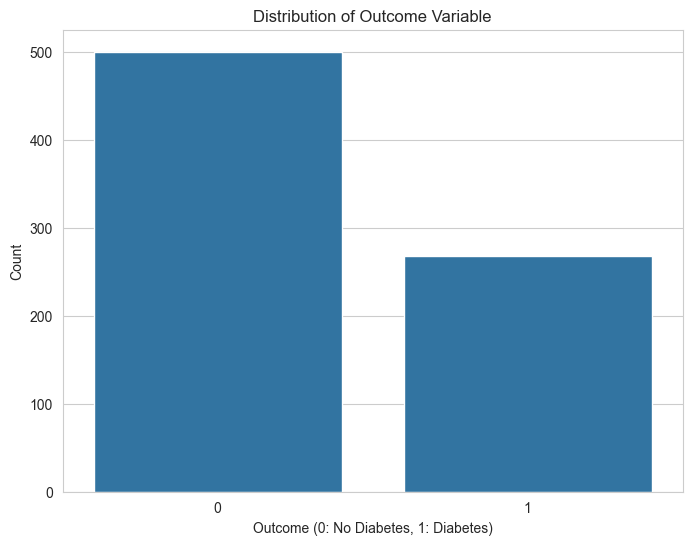

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

**Observation:**
- The classes are imbalanced. There are significantly more non-diabetic (0) instances than diabetic (1) instances. This might require techniques like stratification during data splitting or using class weights during model training.

## 4. Univariate Analysis (Distribution of Features)
Let's visualize the distribution of each numerical feature.

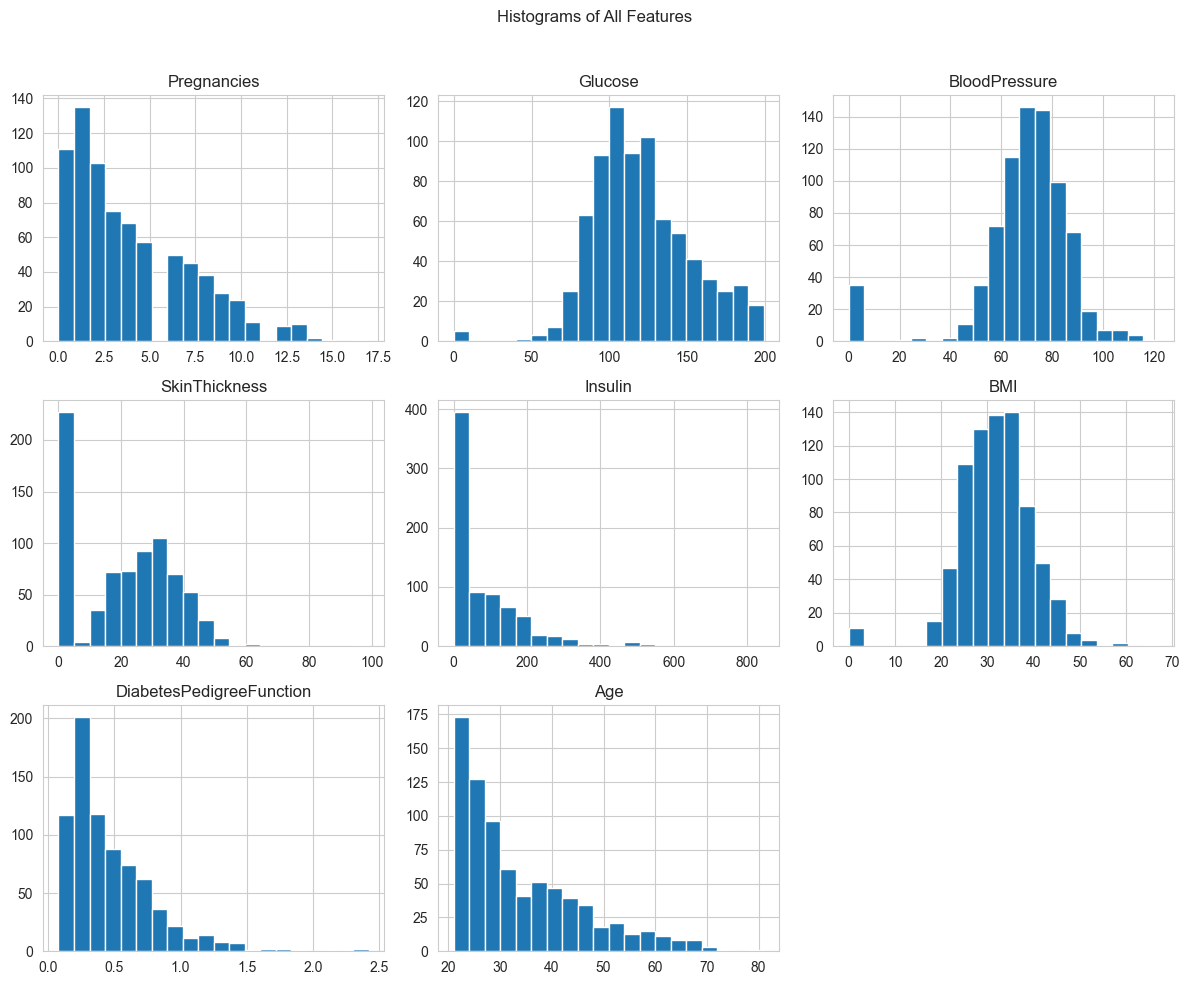

In [7]:
features = df.columns.drop('Outcome')
df[features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of All Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Observation:**
- Many features are right-skewed (e.g., `Pregnancies`, `Insulin`, `DiabetesPedigreeFunction`, `Age`).
- `Glucose` and `BloodPressure` appear to be approximately normally distributed, aside from the erroneous '0' values.

## 5. Bivariate Analysis (Features vs. Outcome)
Let's see how feature distributions differ for diabetic and non-diabetic outcomes.

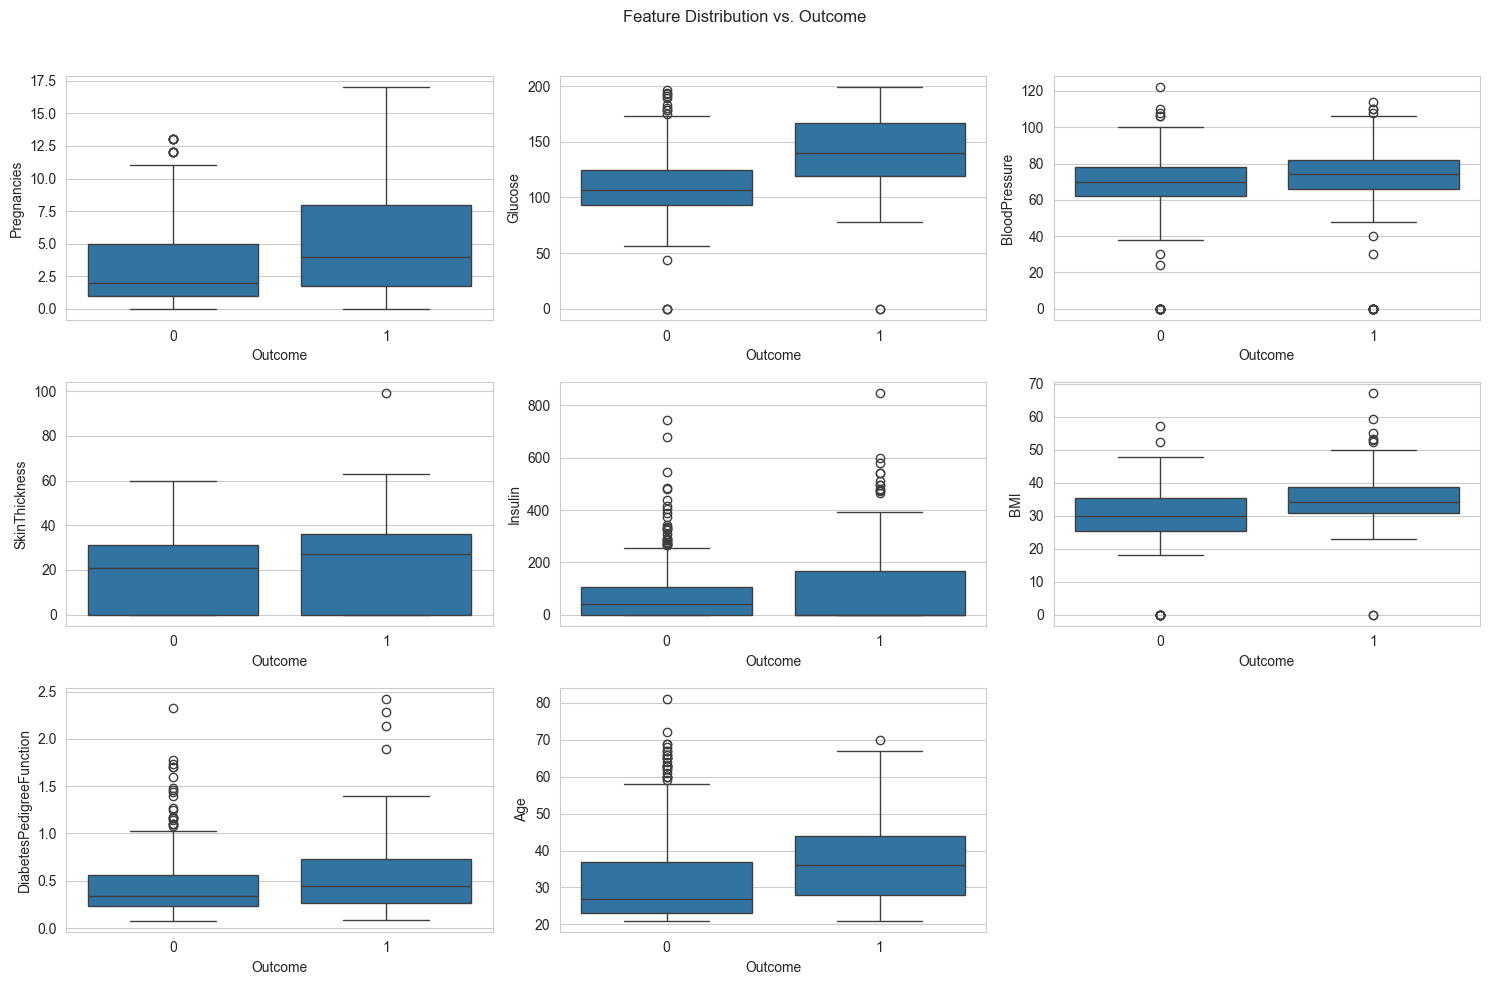

In [8]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=feature, data=df)
plt.suptitle('Feature Distribution vs. Outcome')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Observation:**
- `Glucose`, `BMI`, `Age`, and `Pregnancies` show a noticeable difference in median values between the two outcomes, suggesting they are strong predictors.
- `Insulin` and `DiabetesPedigreeFunction` also show differences, but with a lot of outliers.

## 6. Multivariate Analysis

### 6.1 Correlation Matrix

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

**Observation:**
- `Age` and `Pregnancies` have a moderate positive correlation (0.54).
- `Glucose` has the highest correlation with `Outcome` (0.47).
- `SkinThickness` and `BMI` are moderately correlated.

### 6.2 Pair Plot
A pair plot helps visualize pairwise relationships and distributions, colored by the target variable. 
**Note:** This can be computationally intensive.

In [ ]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Outcome', y=1.02)
plt.show()

**Observation:**
- The pair plot confirms many of the previous findings. For example, the scatter plot of `Glucose` vs. `Age` shows a separation between the blue (non-diabetic) and orange (diabetic) points.
- We can see clear clusters and separations in several plots, reinforcing that a predictive model can be built from this data.

## 7. Summary of EDA Findings
1.  **Data Quality Issue:** The most critical finding is the presence of `0` values in `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`. These are not valid readings and must be treated as missing values during preprocessing.
2.  **Class Imbalance:** The dataset is imbalanced, with more non-diabetic subjects than diabetic ones. This needs to be addressed during modeling.
3.  **Key Predictors:** `Glucose`, `BMI`, and `Age` appear to be the most influential predictors for diabetes based on their distributions and correlation with the `Outcome`.
4.  **Feature Skewness:** Many features are right-skewed, and feature scaling (like Standardization or Normalization) will be essential for distance-based algorithms (e.g., SVM, Logistic Regression).